# Classification Model Comparison: Baseline vs Macro Features

This notebook compares the performance of classification models trained on:
1. **Baseline Features**: Price-based features only (from `model_comparision_classification.ipynb`)
2. **Macro Features**: Price + macro features (from `model_comparision_classification_macro.ipynb`)

## Statistical Tests:
- **McNemar's Test**: Compares prediction agreement/disagreement between models
- **DeLong's Test**: Compares AUC-ROC curves for statistical significance

## Usage:
1. First run `model_comparision_classification.ipynb` (baseline)
2. Then run `model_comparision_classification_macro.ipynb` (macro features)
3. Run this notebook to compare results and perform hypothesis tests

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add project root to Python path
try:
    current_dir = Path.cwd()
    if current_dir.name == 'notebooks':
        project_root = current_dir.parent
    else:
        project_root = current_dir
except:
    project_root = Path(r'C:\Users\34663\FRE 7773\Project_Macro_Impact_On_Lead')

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

os.chdir(project_root)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Import comparison functions
from src.evaluation.compare_classification_results import (
    load_results_from_notebooks,
    create_comparison_table,
    perform_hypothesis_tests,
    visualize_comparison,
    print_comparison_summary
)

print("All imports successful")


Bad key text.latex.preview in file c:\Users\34663\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\34663\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\Users\34663\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

All imports successful


## Step 1: Run Both Classification Notebooks First

**IMPORTANT**: Before running this comparison, you must:

1. Run `model_comparision_classification.ipynb` and execute all cells (especially the model training cell and the save cell at the end)
2. Run `model_comparision_classification_macro.ipynb` and execute all cells (especially the model training cell and the save cell at the end)
3. Then return to this notebook

The results from both notebooks need to be saved as pickle files or in memory.

In [2]:
# ========================================================================
# STEP 1: Load Baseline Results
# ========================================================================
# IMPORTANT: Before running this cell, you have two options:
#
# Option A (Recommended): Run baseline notebook and save results
#   1. Open model_comparision_classification.ipynb
#   2. After running all models, execute the save cell at the end
#   3. Then load here using Option B below
#
# Option B: Load from saved file (if you saved results)
import pickle
import os

baseline_results = {}
baseline_test_y_aligned = None

# Try to load from saved file first
pickle_file = Path("baseline_classification_results.pkl")
if pickle_file.exists():
    try:
        with open(pickle_file, 'rb') as f:
            baseline_data = pickle.load(f)
            baseline_results = baseline_data['results']
            baseline_test_y_aligned = baseline_data['test_y']
        print(f"✓ Baseline results loaded from file: {len(baseline_results)} models")
        print(f"  Models: {list(baseline_results.keys())}")
        print(f"  Test set size: {len(baseline_test_y_aligned)}")
    except Exception as e:
        print(f"⚠ Error loading baseline results: {e}")
else:
    # Try to get from memory (if notebook was just run)
    try:
        baseline_results = results.copy()
        baseline_test_y_aligned = test_y_aligned.copy()
        print(f"✓ Baseline results loaded from memory: {len(baseline_results)} models")
        print(f"  Models: {list(baseline_results.keys())}")
    except NameError:
        print("⚠ Warning: Baseline results not found.")
        print("  Please:")
        print("  1. Run model_comparision_classification.ipynb")
        print("  2. Execute the save cell at the end")
        print("  3. Then run this cell again")

✓ Baseline results loaded from file: 5 models
  Models: ['logistic', 'random_forest', 'svm', 'mlp', 'rnn']
  Test set size: 1213


In [3]:
# ========================================================================
# STEP 2: Load Macro Results
# ========================================================================
# IMPORTANT: Before running this cell:
#
# Option A (Recommended): Run macro notebook and save results
#   1. Open model_comparision_classification_macro.ipynb
#   2. After running all models, execute the save cell at the end
#   3. Then load here using Option B below
#
# Option B: Load from saved file (if you saved results)

macro_results = {}
macro_test_y_aligned = None

# Try to load from saved file first
pickle_file = Path("macro_classification_results.pkl")
if pickle_file.exists():
    try:
        with open(pickle_file, 'rb') as f:
            macro_data = pickle.load(f)
            macro_results = macro_data['results']
            macro_test_y_aligned = macro_data['test_y']
        print(f"✓ Macro results loaded from file: {len(macro_results)} models")
        print(f"  Models: {list(macro_results.keys())}")
        print(f"  Test set size: {len(macro_test_y_aligned)}")
    except Exception as e:
        print(f"⚠ Error loading macro results: {e}")
else:
    # Try to get from memory (if notebook was just run)
    try:
        macro_results = results.copy()
        macro_test_y_aligned = test_y_aligned.copy()
        print(f"✓ Macro results loaded from memory: {len(macro_results)} models")
        print(f"  Models: {list(macro_results.keys())}")
    except NameError:
        print("⚠ Warning: Macro results not found.")
        print("  Please:")
        print("  1. Run model_comparision_classification_macro.ipynb")
        print("  2. Execute the save cell at the end")
        print("  3. Then run this cell again")

✓ Macro results loaded from file: 5 models
  Models: ['logistic', 'random_forest', 'svm', 'mlp', 'rnn']
  Test set size: 1213


In [4]:
# ========================================================================
# VERIFY: Check that we have both sets of results
# ========================================================================
print("=" * 80)
print("RESULTS VERIFICATION")
print("=" * 80)
print(f"Baseline results: {len(baseline_results)} models")
if len(baseline_results) > 0:
    print(f"  Models: {list(baseline_results.keys())}")
    print(f"  Test set size: {len(baseline_test_y_aligned) if baseline_test_y_aligned is not None else 'N/A'}")
print(f"\nMacro results: {len(macro_results)} models")
if len(macro_results) > 0:
    print(f"  Models: {list(macro_results.keys())}")
    print(f"  Test set size: {len(macro_test_y_aligned) if macro_test_y_aligned is not None else 'N/A'}")

if len(baseline_results) == 0 or len(macro_results) == 0:
    print("\n⚠ WARNING: Missing results! Please ensure both notebooks have been run.")
    print("  You can save results in each notebook by executing the save cell at the end.")
else:
    print("\n✓ Both result sets loaded successfully. Proceeding with comparison...")
print("=" * 80)

RESULTS VERIFICATION
Baseline results: 5 models
  Models: ['logistic', 'random_forest', 'svm', 'mlp', 'rnn']
  Test set size: 1213

Macro results: 5 models
  Models: ['logistic', 'random_forest', 'svm', 'mlp', 'rnn']
  Test set size: 1213

✓ Both result sets loaded successfully. Proceeding with comparison...


## Step 2: Organize and Compare Results

In [5]:
# Verify we have both sets of results
if len(baseline_results) == 0 or len(macro_results) == 0:
    print("ERROR: Missing results from one or both notebooks!")
    print(f"Baseline results: {len(baseline_results)} models")
    print(f"Macro results: {len(macro_results)} models")
    print("\nPlease ensure both classification notebooks have been run and results saved.")
else:
    # Organize results for comparison
    comparison_data = load_results_from_notebooks(
        baseline_results=baseline_results,
        macro_results=macro_results,
        baseline_y_true=baseline_test_y_aligned,
        macro_y_true=macro_test_y_aligned
    )
    
    print(f"✓ Comparison data organized for {len(comparison_data)} models")
    print(f"  Models: {list(comparison_data.keys())}")

✓ Comparison data organized for 5 models
  Models: ['random_forest', 'logistic', 'rnn', 'svm', 'mlp']


## Step 3: Create Comparison Table

In [ ]:

# Create comparison table
comparison_df = create_comparison_table(comparison_data)

print("Comparison Table:")
print("=" * 120)
display_df = comparison_df.copy()
for col in display_df.columns:
    if col != 'Model' and 'Diff' not in col:
        display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}" if not np.isnan(x) else "N/A")
    elif 'Diff' in col:
        display_df[col] = display_df[col].apply(lambda x: f"{x:+.4f}" if not np.isnan(x) else "N/A")
print(display_df.to_string(index=False))

# Show summary
print("\n" + "=" * 120)
print("SUMMARY:")
print(f"Average Accuracy Improvement: {comparison_df['Accuracy_Diff'].mean():.4f}")
print(f"Average F1-Score Improvement: {comparison_df['F1_Diff'].mean():.4f}")
print(f"Average AUC-ROC Improvement: {comparison_df['AUC_Diff'].mean():.4f}")
print(f"Models with improved accuracy: {(comparison_df['Accuracy_Diff'] > 0).sum()}/{len(comparison_df)}")
print(f"Models with improved F1: {(comparison_df['F1_Diff'] > 0).sum()}/{len(comparison_df)}")
print(f"Models with improved AUC: {(comparison_df['AUC_Diff'] > 0).sum()}/{len(comparison_df)}")

Comparison Table:
        Model Baseline_Accuracy Macro_Accuracy Accuracy_Diff Baseline_Precision Macro_Precision Precision_Diff Baseline_Recall Macro_Recall Recall_Diff Baseline_F1 Macro_F1 F1_Diff Baseline_AUC Macro_AUC AUC_Diff
Random Forest            0.5070         0.5392       +0.0322             0.5144          0.5459        +0.0315          0.5511       0.5592     +0.0081      0.5321   0.5524 +0.0204       0.5012    0.5502  +0.0491
     Logistic            0.5029         0.5120       +0.0091             0.5058          0.5110        +0.0052          0.9887       0.9400     -0.0486      0.6692   0.6621 -0.0071       0.4155    0.5404  +0.1250
          Rnn            0.4688         0.5054       +0.0366             0.4847          0.5069        +0.0222          0.7283       0.9607     +0.2324      0.5821   0.6637 +0.0816       0.4396    0.5363  +0.0967
          Svm            0.4699         0.5235       +0.0536             0.4831          0.5327        +0.0496          0.6013    

## Step 4: Perform Statistical Hypothesis Tests

In [7]:
# Perform statistical hypothesis tests
test_results_df = perform_hypothesis_tests(comparison_data)

print("Hypothesis Test Results:")
print("=" * 120)
test_display = test_results_df.copy()

# Format for display
for col in test_display.columns:
    if col not in ['Model', 'McNemar_Significant', 'DeLong_Significant']:
        if 'PValue' in col or 'Improvement' in col:
            test_display[col] = test_display[col].apply(lambda x: f"{x:.4f}" if not np.isnan(x) else "N/A")
        else:
            test_display[col] = test_display[col].apply(lambda x: f"{x:.2f}" if not np.isnan(x) else "N/A")
    elif 'Significant' in col:
        test_display[col] = test_display[col].apply(lambda x: "✓ Yes" if x else "✗ No")

print(test_display.to_string(index=False))

# Summary of significance
print("\n" + "=" * 120)
print("STATISTICAL SIGNIFICANCE SUMMARY:")
significant_mcnemar = test_results_df[test_results_df['McNemar_Significant']]
significant_delong = test_results_df[test_results_df['DeLong_Significant']]

mcnemar_performed = test_results_df['McNemar_PValue'].notna().sum()
delong_performed = test_results_df['DeLong_PValue'].notna().sum()

print(f"\nMcNemar's Test (Tests performed: {mcnemar_performed}/{len(test_results_df)}):")
if mcnemar_performed > 0:
    print(f"  Models with statistically significant differences (p < 0.05): {len(significant_mcnemar)}")
    if len(significant_mcnemar) > 0:
        for _, row in significant_mcnemar.iterrows():
            improvement = comparison_df[comparison_df['Model'] == row['Model']]['Accuracy_Diff'].iloc[0]
            direction = "Macro better" if improvement > 0 else "Baseline better"
            print(f"    - {row['Model']}: p = {row['McNemar_PValue']:.4f} ({direction})")
    else:
        print("  No models show statistically significant differences.")
else:
    print("  Not performed (test sets may be incompatible)")

print(f"\nDeLong's Test (Tests performed: {delong_performed}/{len(test_results_df)}):")
if delong_performed > 0:
    print(f"  Models with statistically significant AUC differences (p < 0.05): {len(significant_delong)}")
    if len(significant_delong) > 0:
        for _, row in significant_delong.iterrows():
            improvement = comparison_df[comparison_df['Model'] == row['Model']]['AUC_Diff'].iloc[0]
            direction = "Macro better" if improvement > 0 else "Baseline better"
            print(f"    - {row['Model']}: p = {row['DeLong_PValue']:.4f} ({direction})")
    else:
        print("  No models show statistically significant differences.")
else:
    print("  Not performed (test sets may be incompatible)")

Hypothesis Test Results:
        Model Accuracy_Improvement F1_Improvement AUC_Improvement McNemar_Statistic McNemar_PValue McNemar_Significant DeLong_ZScore DeLong_PValue DeLong_Significant
Random Forest               0.0322         0.0204          0.0491              2.56         0.1093                ✗ No          2.33        0.0198              ✓ Yes
     Logistic               0.0091        -0.0071          0.1250              1.20         0.2724                ✗ No          6.10        0.0000              ✓ Yes
          Rnn               0.0366         0.0816          0.0967            211.70         0.0000               ✓ Yes        -10.33        0.0000              ✓ Yes
          Svm               0.0536        -0.0119          0.0948              8.38         0.0038               ✓ Yes          4.58        0.0000              ✓ Yes
          Mlp               0.0668         0.0245          0.0797             12.72         0.0004               ✓ Yes          3.98        0.000

## Step 5: Comprehensive Summary

In [8]:
# Print comprehensive summary
print_comparison_summary(comparison_df, test_results_df)

CLASSIFICATION MODEL COMPARISON: BASELINE vs MACRO FEATURES

NOTE:
----------------------------------------------------------------------------------------------------
Baseline models use: lopbdy_features.csv (price features only)
Macro models use: all_features_with_macro.csv (price + macro features)

⚠ IMPORTANT: If test sets differ, paired prediction tests (McNemar's) may not be applicable.
  Metric comparisons (Accuracy, F1, AUC differences) are still valid.
  Statistical tests require compatible test set sizes.

SUMMARY STATISTICS:
----------------------------------------------------------------------------------------------------
Average Accuracy Improvement: 0.0396
Average F1-Score Improvement: 0.0215
Average AUC-ROC Improvement: 0.0891

BEST IMPROVEMENTS:
----------------------------------------------------------------------------------------------------
Best Accuracy Improvement: Mlp (0.0668)
Best F1-Score Improvement: Rnn (0.0816)
Best AUC-ROC Improvement: Logistic (0.1250)

S

## Step 6: Visualizations

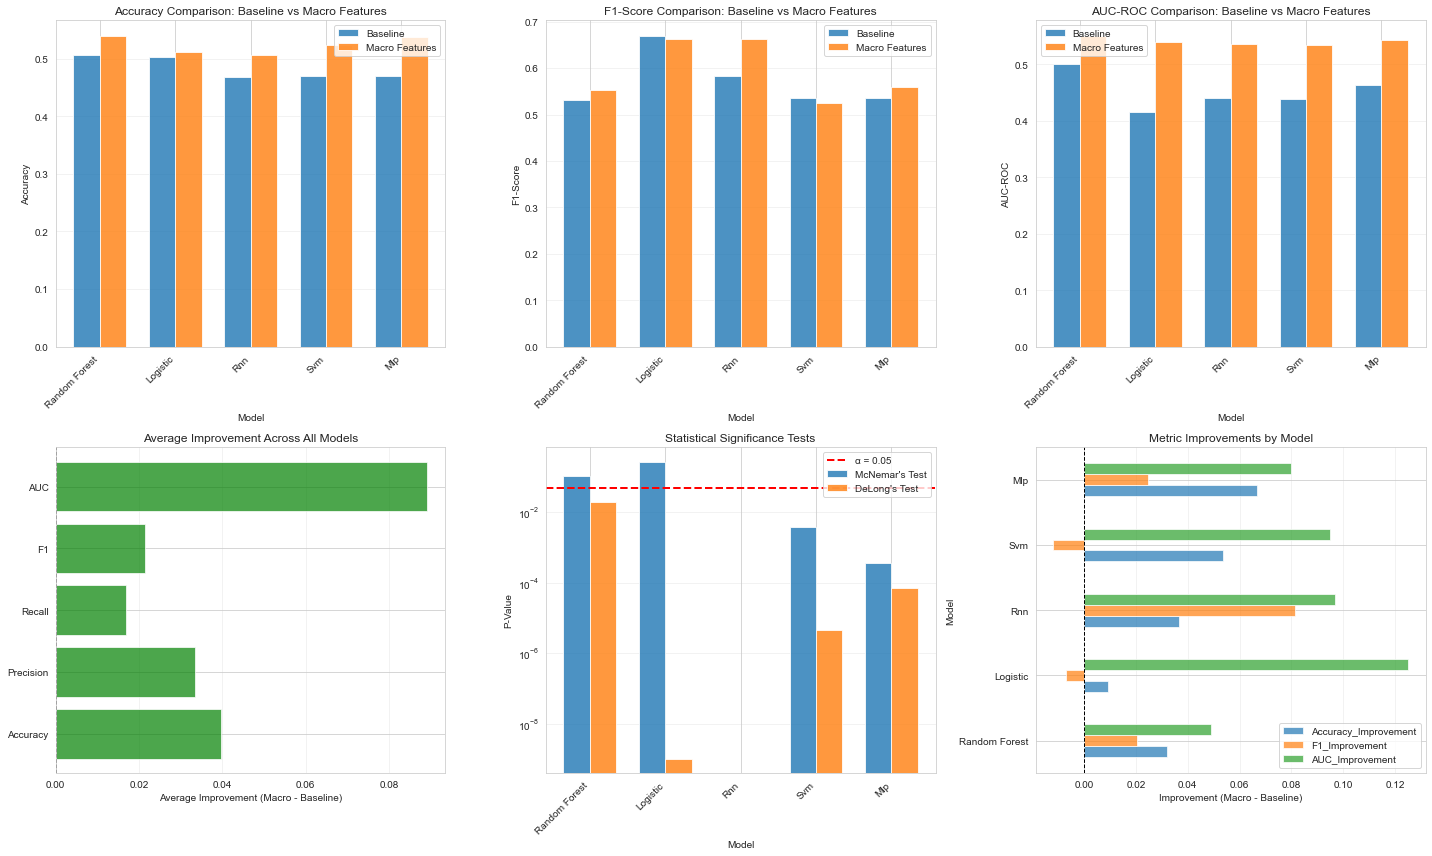


✓ Figures saved to: ..\src\interpretation


In [9]:
# Create comprehensive visualizations
figure_path = Path("../src/interpretation")
figure_path.mkdir(parents=True, exist_ok=True)

visualize_comparison(comparison_df, test_results_df, save_path=figure_path)
print(f"\n✓ Figures saved to: {figure_path}")

## Interpretation Guide

### Statistical Tests:

1. **McNemar's Test**:
   - **Purpose**: Tests if there's a significant difference in prediction agreement between two models on the same test set
   - **Null Hypothesis (H₀)**: Both models have the same error rate (same proportion of correct/incorrect predictions)
   - **Alternative Hypothesis (H₁)**: Models have different error rates
   - **Interpretation**: 
     - p < 0.05: Reject H₀ → One model significantly outperforms the other
     - p ≥ 0.05: Fail to reject H₀ → No significant difference in error rates
   - **Test Statistic**: Chi-squared distribution

2. **DeLong's Test**:
   - **Purpose**: Tests if there's a significant difference in AUC-ROC between two models
   - **Null Hypothesis (H₀)**: Both models have the same AUC-ROC
   - **Alternative Hypothesis (H₁)**: Models have different AUC-ROC values
   - **Interpretation**: 
     - p < 0.05: Reject H₀ → Significant difference in discriminative ability
     - p ≥ 0.05: Fail to reject H₀ → No significant difference in AUC
   - **Test Statistic**: Z-score (normal distribution)

### Improvement Metrics:
- **Positive values**: Macro features improve performance over baseline
- **Negative values**: Baseline features perform better than macro
- **Larger absolute values**: Larger improvement/degradation

### Key Findings:
- Check which models show **statistically significant improvements** (p < 0.05)
- Models with both **large improvements AND significant p-values** are strong candidates
- Consider **practical significance** in addition to statistical significance (effect size)